<a href="https://colab.research.google.com/github/skrzypczykt/Poem/blob/master/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LINEAR SINGLE LAYER  PERCEPTRON FOR TIME SERIES  FORECASTING 
$$y = asin(bx) + d$$

In [1]:
a = 1
b = 5
d = 0.1
n_steps = 3

In [2]:
import math
import random
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
f = lambda x:a*math.sin(b*x) + d

In [3]:
#Gerenrating 120 time series
data = []
ys = []
for i in np.arange(start =0,stop = 12, step=0.1 ):
  data.append([f(i), f(i+0.1), f(i+0.2)])
  ys.append([f(i+0.3)])

data = np.array(data)
ys = np.array(ys)

In [4]:
#creating subsets 30, 50, 100 series and  20 test ones
X_train_100, X_test, y_train_100, y_test = train_test_split(data, ys, test_size=20)
random_50 = random.choices(range(100), k=50)
random_30 = random.choices(range(100), k=30)
X_train_50, y_train_50 = X_train_100[random_50], y_train_100[random_50]
X_train_30, y_train_30 = X_train_100[random_30], y_train_100[random_30]

Since we got a =1 and very small d=0.1 our values are in the range of -0.9 til 1.1 hence we decide not to perform the minimax scaling.

In [5]:
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from tensorflow.keras.layers import Dense
sgd = 'sgd'
adam = 'adam'

In [6]:
def create_model( optimizer, lr=0.1):
  model = tf.keras.models.Sequential([Dense(1,input_shape=(n_steps,), activation='sigmoid'), Dense(1)])
  if optimizer == "sgd":
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr), loss='mse')
  elif optimizer == 'adam':
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse')
  return model

Training for 10 hidden neurons and SGD optimizer with 0.01 learning rate

In [ ]:
model = create_model( sgd)
history = model.fit(X_train_100, y_train_100, epochs=50)

In [8]:
import matplotlib.pyplot as plt

def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$f(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10, label='true')
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro", label='predicted')
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.legend()
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, d-a, d +a])

Text(0.5, 1.0, 'The error  change depending on the epoch')

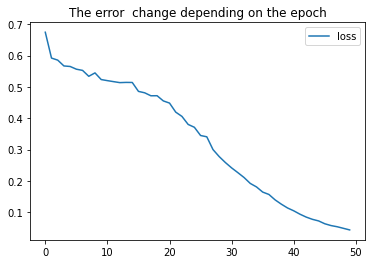

In [9]:
pd.DataFrame(history.history).plot()
plt.title("The error  change depending on the epoch")

In [10]:
y_pred_train = model.predict(X_train_100)
deviation_train = y_pred_train - y_train_100
conc = np.concatenate((y_train_100, y_pred_train, deviation_train), axis=1)
df = pd.DataFrame(conc, columns=['true','predicted','deviation'])
df

,true,predicted,deviation
0,-0.779696,-0.449514,0.330182
1,-0.656802,-0.356666,0.300136
2,0.845113,0.846399,0.001286
3,-0.363816,-0.334537,0.029278
4,1.099912,0.922007,-0.177904
...,...,...,...
95,1.090607,0.905037,-0.185570
96,-0.853753,-0.551843,0.301910
97,1.098591,0.915953,-0.182638
98,0.594885,0.481489,-0.113396


In [11]:
y_pred = model.predict(X_test)

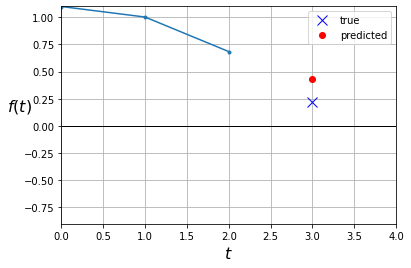

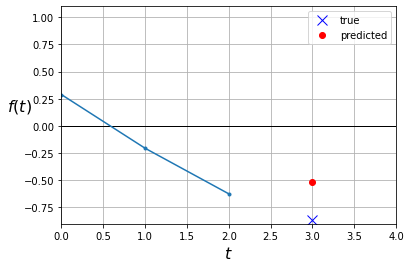

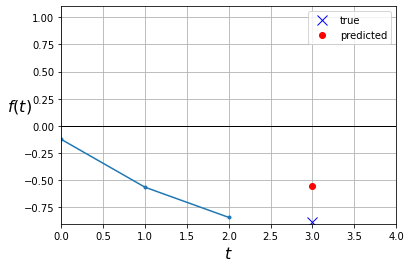

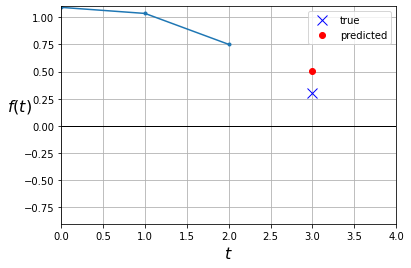

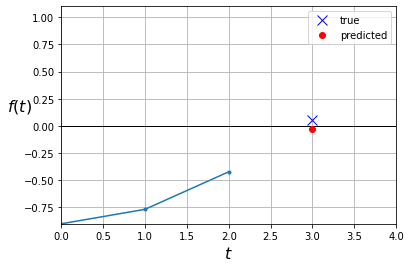

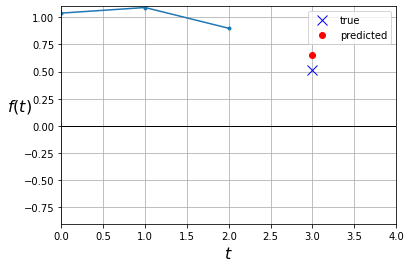

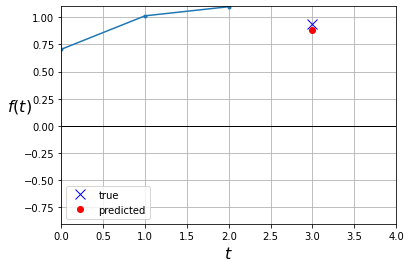

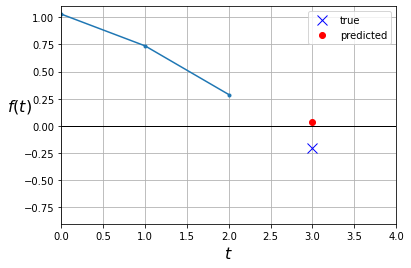

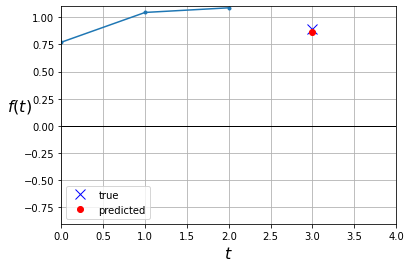

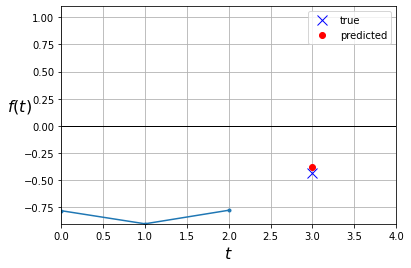

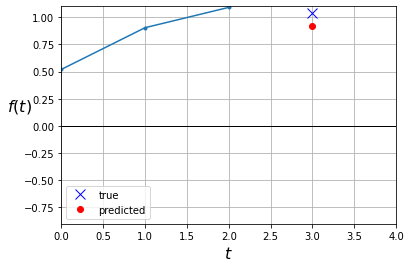

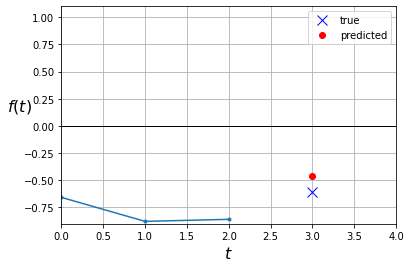

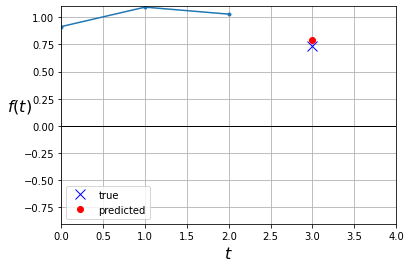

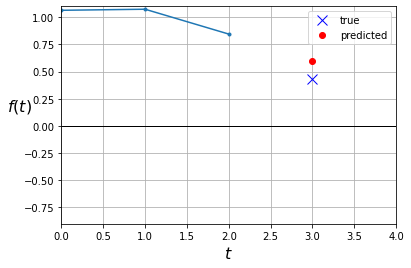

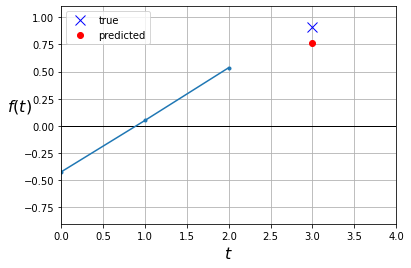

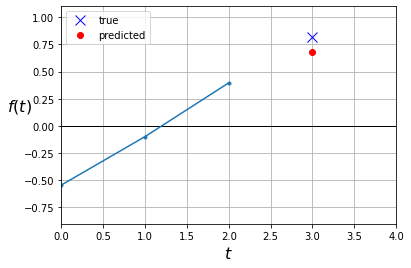

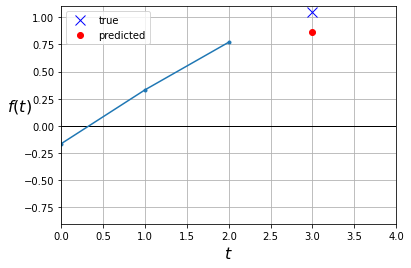

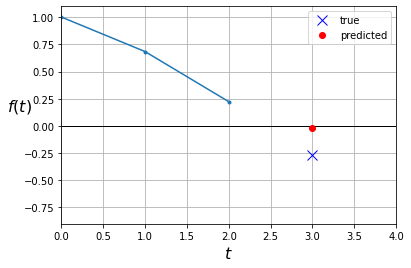

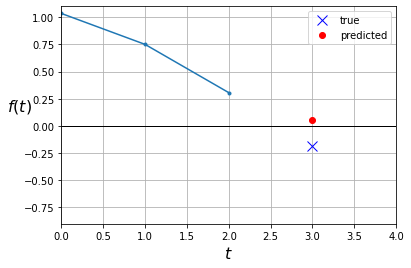

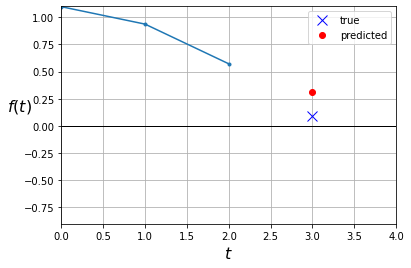

In [12]:
#plotting some results
for i in range(20):
  plot_series(X_test[i, :], y_test[i], y_pred[i])
  plt.show()

In [13]:
deviation = y_pred - y_test
conc = np.concatenate((y_test, y_pred, deviation), axis=1)
df = pd.DataFrame(conc, columns=['true','predicted','deviation'])
df

,true,predicted,deviation
0,0.223573,0.432171,0.208598
1,-0.866118,-0.513917,0.352201
2,-0.888032,-0.556042,0.331990
3,0.306467,0.501043,0.194575
4,0.051351,-0.024794,-0.076146
5,0.512118,0.655114,0.142996
6,0.936656,0.885324,-0.051331
7,-0.204811,0.039565,0.244375
8,0.887705,0.865316,-0.022389
9,-0.436573,-0.377498,0.059075


Tuning the learning rate

In [ ]:
results_train_lr = {}
for lr in [0.4, 0.2, 0.1, 0.05, 0.01]:

  model = create_model( sgd, lr=lr)
  history = model.fit(X_train_100, y_train_100, epochs=50, verbose=0)
  results_train_lr[lr] = model.evaluate(X_test,y_test)



In [15]:
results_train_lr

{0.01: 0.442023366689682,
 0.05: 0.36279135942459106,
 0.1: 0.004654988646507263,
 0.2: 0.0019702285062521696,
 0.4: 0.0020912857726216316}

Best learning rate for Stochastig Gradient Descent = 0.02

#Training size 100, 50 and 30

In [ ]:
results_train_size = {}
for (X,y), num in zip([[X_train_100, y_train_100],[X_train_50, y_train_50],[X_train_30, y_train_30]], [100, 50, 30]):

  model = create_model( sgd, lr=0.2)
  history = model.fit(X, y, epochs=50, verbose=0)
  results_train_size[num] = model.evaluate(X_test,y_test)

In [17]:
results_train_size

{30: 0.10506763309240341, 50: 0.03201679885387421, 100: 0.0020762826316058636}

The best results are achieved for 100 training samples, what was expected.

#The same for adaptive learning rate

In [ ]:
results_train_size = {}
for (X,y), num in zip([[X_train_100, y_train_100],[X_train_50, y_train_50],[X_train_30, y_train_30]], [100, 50, 30]):

  model = create_model(adam)
  history = model.fit(X, y, epochs=50, verbose=0)
  results_train_size[num] = model.evaluate(X_test,y_test)

In [19]:
results_train_size

{30: 0.30472350120544434, 50: 0.1782398521900177, 100: 0.10566973686218262}